In [1]:
# Data from statsbomb and using pandas dataframes
import statsbomb as sb
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# Machine learning
from sklearn import preprocessing, model_selection, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

In [2]:
# Get all competitions
competitions = sb.Competitions()
 
# Get json data
json_data = competitions.data
 
# Convert to dataframe
df = competitions.get_dataframe()


In [3]:
# Showing the competitions
# We will find and pick the data for World Cup 2018
df

,competition_gender,competition_id,competition_name,country_name,match_available,match_updated,season_id,season_name
0,female,37,FA Women's Super League,England,2020-04-17T03:24:07.811908,2020-04-17T03:24:07.811908,42,2019/2020
1,female,37,FA Women's Super League,England,2020-02-27T15:55:20.540,2020-02-27T15:55:20.540,4,2018/2019
2,male,43,FIFA World Cup,International,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756,3,2018
3,male,11,La Liga,Spain,2020-02-27T12:19:39.458017,2020-02-27T12:19:39.458017,4,2018/2019
4,male,11,La Liga,Spain,2020-02-27T12:19:39.458017,2020-02-27T12:19:39.458017,1,2017/2018
5,male,11,La Liga,Spain,2019-12-16T23:09:16.168756,2020-04-01T14:15:08.846728,2,2016/2017
6,male,11,La Liga,Spain,2020-04-13T23:02:59.803428,2020-04-13T23:02:59.803428,27,2015/2016
7,male,11,La Liga,Spain,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756,26,2014/2015
8,male,11,La Liga,Spain,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756,25,2013/2014
9,male,11,La Liga,Spain,2020-04-13T23:02:59.803428,2020-04-13T23:02:59.803428,24,2012/2013


In [4]:
# Get all World Cup matches
wc_matches = sb.Matches(event_id = '43', season_id = '3').get_dataframe()

In [5]:
# Show the World Cup games
wc_matches.head()

,away_score,away_team,competition,competition_stage,home_score,home_team,kick_off,last_updated,match_date,match_id,match_status,match_week,metadata,referee,season,stadium
0,2,784,43,"{'id': 10, 'name': 'Group Stage'}",0,792,16:00:00.000,2019-12-16T23:09:16.168756,2018-06-26,7562,available,3,{'data_version': '1.0.2'},"{'id': 725, 'name': 'S. Karasev'}",3,"{'id': 249, 'name': 'Olimpiyskiy Stadion Fisht..."
1,0,793,43,"{'id': 10, 'name': 'Group Stage'}",2,775,17:00:00.000,2019-12-16T23:09:16.168756,2018-06-22,7549,available,2,{'data_version': '1.0.2'},"{'id': 739, 'name': 'M. Conger'}",3,"{'id': 4257, 'name': 'Volgograd Arena', 'count..."
2,2,781,43,"{'id': 10, 'name': 'Group Stage'}",0,786,20:00:00.000,2019-12-16T23:09:16.168756,2018-06-27,7565,available,3,{'data_version': '1.0.2'},"{'id': 741, 'name': 'A. Faghani'}",3,"{'id': 4130, 'name': 'Otkrytiye Arena', 'count..."
3,1,776,43,"{'id': 33, 'name': 'Round of 16'}",1,785,20:00:00.000,2019-12-16T23:09:16.168756,2018-07-01,7581,available,3,{'data_version': '1.0.2'},"{'id': 730, 'name': 'N. Pitana'}",3,"{'id': 4263, 'name': 'Stadion Nizhny Novgorod'..."
4,1,780,43,"{'id': 10, 'name': 'Group Stage'}",1,797,20:00:00.000,2019-12-16T23:09:16.168756,2018-06-25,7557,available,3,{'data_version': '1.0.2'},"{'id': 731, 'name': 'E. Cáceres'}",3,"{'id': 4259, 'name': 'Mordovia Arena', 'countr..."


In [6]:
# But we want to focus on shots and goals
# Create a list of all match ids for the matches in the 2018 World Cup 
match_list = wc_matches['match_id'].tolist()
 
# Create an empty dataframe to add all shots
shots_df = pd.DataFrame()
 
# Loop through and add all shots from every match to the empty dataframe
for i in match_list:
    events = sb.Events(event_id=str(i))
    shot = events.get_dataframe(event_type='shot')
    shots_df = shots_df.append(shot)

In [7]:
# Details on our data
print(len(shots_df), "is the total number of shots from every match at the 2018 World Cup!")
print("--------------------")
 
print("Columns:")
print(list(shots_df))
print("--------------------")
 
print("Unique values:")
print(shots_df['type'].unique())
print("--------------------")
 
print("Unique values in the 'play_pattern' column:")
print(shots_df['play_pattern'].unique())

1706 is the total number of shots from every match at the 2018 World Cup!
--------------------
Columns:
['event_type', 'id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'possession_team', 'play_pattern', 'off_camera', 'team', 'player', 'position', 'duration', 'under_pressure', 'statsbomb_xg', 'key_pass_id', 'body_part', 'type', 'outcome', 'technique', 'first_time', 'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected', 'start_location_x', 'start_location_y', 'end_location_x', 'end_location_y', 'end_location_z']
--------------------
Unique values:
['Open Play' 'Free Kick' 'Penalty']
--------------------
Unique values in the 'play_pattern' column:
['From Free Kick' 'From Throw In' 'Regular Play' 'From Corner'
 'From Counter' 'From Kick Off' 'From Goal Kick' 'Other' 'From Keeper']


In [8]:
# Remove penalties from the data since they are misleading in our analysis of shots
nopen_shots = shots_df[shots_df['type'] != 'Penalty']

In [9]:
# Create a goal column, where 1 = goal and 0 = no goal
nopen_shots['goal'] = np.where(nopen_shots['outcome'] == 'Goal', 1, 0)

C:\Users\anike\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# Show data
nopen_shots.head()

,event_type,id,index,period,timestamp,minute,second,possession,possession_team,play_pattern,...,redirect,one_on_one,open_goal,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z,goal
0,shot,3b024ca6-0f06-4a3a-b422-34f1355d2fba,250,1,00:04:17.267,4,17,12,Australia,From Free Kick,...,None,None,None,None,97.0,53.0,120.0,39.3,4.7,0
1,shot,f1de802d-b961-45d5-a36d-8b6d897088df,575,1,00:11:27.587,11,27,27,Australia,From Throw In,...,None,None,None,None,95.0,46.0,100.0,44.0,NaN,0
2,shot,a83a9857-68a0-4c2c-b7b1-0ea70da109b0,831,1,00:17:14.547,17,14,36,Peru,Regular Play,...,None,None,None,None,104.0,53.0,120.0,36.4,0.5,1
3,shot,dfd5c67f-79f6-4f1c-8729-835b2bda6b48,920,1,00:20:00.707,20,0,39,Australia,From Throw In,...,None,None,None,None,112.0,42.0,120.0,43.0,NaN,0
4,shot,06bbee1b-90c7-4f4f-bb16-21bed1cbe592,1049,1,00:24:07.787,24,7,47,Peru,From Free Kick,...,None,None,None,None,109.0,37.0,119.0,41.9,1.3,0


In [11]:
# Calculating average shot conversion rate
attempts = len(nopen_shots)
goals = sum(nopen_shots['goal'])
misses = attempts - goals
conversion_rate = goals / attempts
print('Average conversion rate: ',round(conversion_rate*100,2),"%")

Average conversion rate:  8.24 %


Text(0.5, 1.0, 'Outcome of shots')

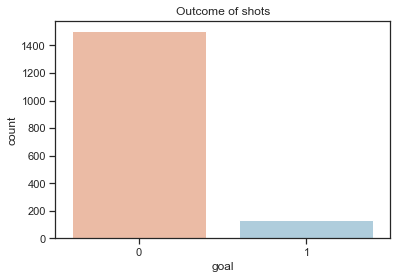

In [22]:
# Show graph
# We see that most shots end up not being being a goal
sns.set(style="ticks", color_codes=True)
sns.countplot(x="goal", data=nopen_shots, palette = 'RdBu').set_title('Outcome of shots')

In [13]:
# Feature engineering - Make new variables out of the raw data to improve model
# Resetting index
nopen_shots = nopen_shots.reset_index().drop('level_0', axis=1)
 
# Our new variables: distance
# Length of soccer field is 120 units long and width is 80 units wide
# Use distance formula and angle from the centre of the goal being scored on ,at (120, 40), to location of shot
nopen_shots['x_distance'] = 120 - nopen_shots['start_location_x']
nopen_shots['y_distance'] = abs(40 - nopen_shots['start_location_y'])
nopen_shots['distance'] = np.sqrt((nopen_shots['x_distance']**2 + nopen_shots['y_distance']**2))

# If we know the player's weak and strong foot, we can make look at these data individual
nopen_shots['body_part'] = np.where((nopen_shots['body_part'] == 'Right Foot')
                                 | (nopen_shots['body_part'] == 'Left Foot'), 'foot',
                                np.where(nopen_shots['body_part'] == 'Head', 'head', 'other'))

In [14]:
# Find model features in cols
feature_cols = ['play_pattern', 'under_pressure', 'body_part', 'technique', 'first_time',
                'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected', 'distance']


features = nopen_shots[feature_cols]
# Find model labels
labels = nopen_shots['goal']
 
# 0 to NA values
features = features.fillna(0)
labels = labels.fillna(0)

In [15]:
# Show features
# As you can see, we have the new variables of distance and angle and have filled up NA values with 0
# We have the relevant and useful information we need
features

,play_pattern,under_pressure,body_part,technique,first_time,follows_dribble,redirect,one_on_one,open_goal,deflected,distance
0,From Free Kick,0,foot,Normal,True,0,0,0,0,0,26.419690
1,From Throw In,True,foot,Normal,0,0,0,0,0,0,25.709920
2,Regular Play,True,foot,Volley,True,0,0,0,0,0,20.615528
3,From Throw In,0,head,Normal,0,0,0,0,0,0,8.246211
4,From Free Kick,0,head,Normal,0,0,0,0,0,0,11.401754
5,From Throw In,0,foot,Normal,0,0,0,0,0,0,15.000000
6,Regular Play,0,foot,Normal,0,0,0,0,0,0,37.656341
7,From Corner,True,head,Normal,0,0,0,0,0,0,5.000000
8,From Free Kick,0,head,Normal,0,0,0,0,0,0,7.810250
9,Regular Play,0,foot,Normal,True,0,0,0,0,0,9.848858


In [16]:
# Label Encoding
# Make all categorical features to discrete values
cat_cols = ['play_pattern', 'under_pressure', 'body_part', 'technique', 'first_time',
                'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected']
 
cat_features = features[cat_cols]
features = features.drop(cat_cols, axis=1)
features.head()

,distance
0,26.419690
1,25.709920
2,20.615528
3,8.246211
4,11.401754


In [17]:
# Discrete values for each category
le = preprocessing.LabelEncoder()
cat_features = cat_features.apply(le.fit_transform)

# Merge
features = features.merge(cat_features, left_index=True, right_index=True)
features.head()
# Now we have turned all categorical features into discrete values, so we can work with a consistent dataset

,distance,play_pattern,under_pressure,body_part,technique,first_time,follows_dribble,redirect,one_on_one,open_goal,deflected
0,26.419690,2,0,0,4,1,0,0,0,0,0
1,25.709920,6,1,0,4,0,0,0,0,0,0
2,20.615528,8,1,0,6,1,0,0,0,0,0
3,8.246211,6,0,1,4,0,0,0,0,0,0
4,11.401754,2,0,1,4,0,0,0,0,0,0


In [18]:
# X = model features, and y = labels
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, shuffle=True, random_state=42)

# Using the Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
 
# Training
clf.fit(X_train, y_train)
 
# Making predictions
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

Predicted goals from test data: 25
xG: 26.25
Actual goals (from test set): 23
Difference from my xG value and actual goals =  3.25

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       305
           1       0.24      0.26      0.25        23

    accuracy                           0.89       328
   macro avg       0.59      0.60      0.60       328
weighted avg       0.89      0.89      0.89       328



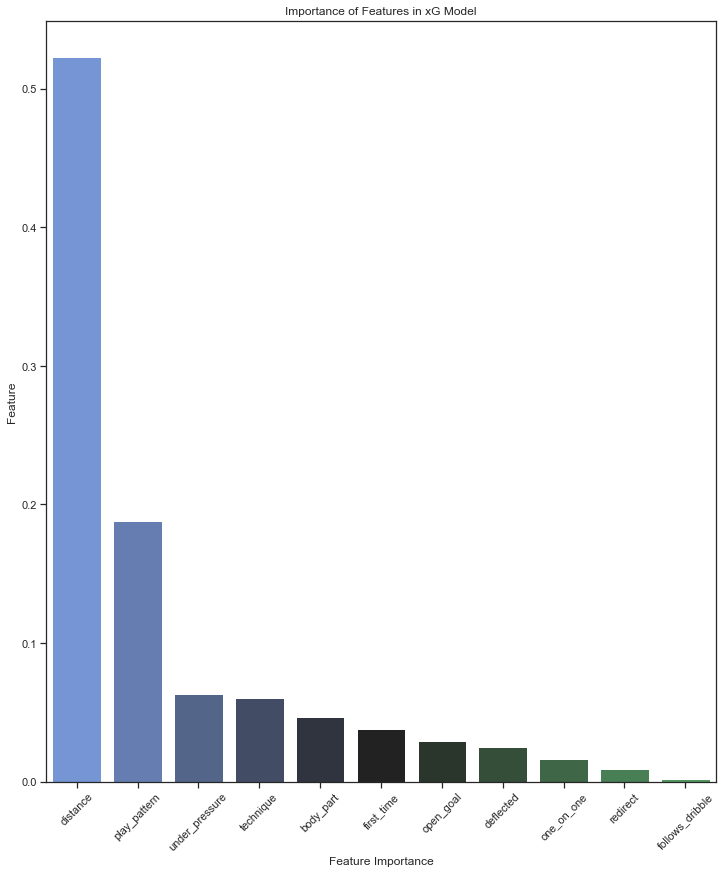

In [20]:

# Print results
print("Predicted goals from test data:", sum(y_pred))
print("xG:", "{0:.2f}".format(sum(y_pred_prob[:,1])))
print("Actual goals (from test set):", sum(y_test))
print('Difference from my xG value and actual goals = ','{0:.2f}'.format(sum(y_pred_prob[:,1])-sum(y_test)))
print('')
print(metrics.classification_report(y_test, y_pred))
# Precision means of all the goals the modelled claimed to be a goal, how many were goals?
# Recall means of all the actual goals, how many did the model predict to be a goal?
# F1 score is the average of precision and recall, so the higher the F1 score, the better the model
 
# Find the most important feature for goal
important_features = pd.DataFrame({'feature':features.columns,'importance':np.round(clf.feature_importances_,3)})
important_features = important_features.sort_values('importance',ascending=False)
 
f, ax = plt.subplots(figsize=(12, 14))
g = sns.barplot(x='feature', y='importance', data=important_features, palette=sns.diverging_palette(255, 133, l=60, n=11, center="dark"), label="Total")
g.set(xlabel='Feature Importance', ylabel='Feature', title='Importance of Features in xG Model')
plt.xticks(rotation=45);
# plt.show()
plt.savefig('featureImportance.png')